In [77]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'''

In [78]:
import numpy as np
from mres import wv_pipeline, plot_fixed_results, plot_against_tau, plot_im_against_tau, plot_against_sigma, plot_im_against_sigma, plot_im_deltas
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [79]:
plt.rcParams.update({
    'text.usetex': True,
    'font.size': 22
})

In [4]:
generator = np.random.default_rng()

In [5]:
params = {
    'omega_as': None,
    'omega_a_0': 0,
    'omega_f': 1,
    'g': 1,
    'u': None,
    'v': None,
    'm': np.array([1,-1j,0])/2,
    't': 1,
    'tau': 0,
    'gamma': 0,
    'm_to_int': False,
    'a': 0,
    'b': 1,
    'rwa': False
}

In [60]:
delta = 1e-4
params['u'] = np.array([-np.sin(delta),0,np.cos(delta)])
params['v'] = np.array([0,0,-1])
params['m']=  np.array([1,-1j,0])/2

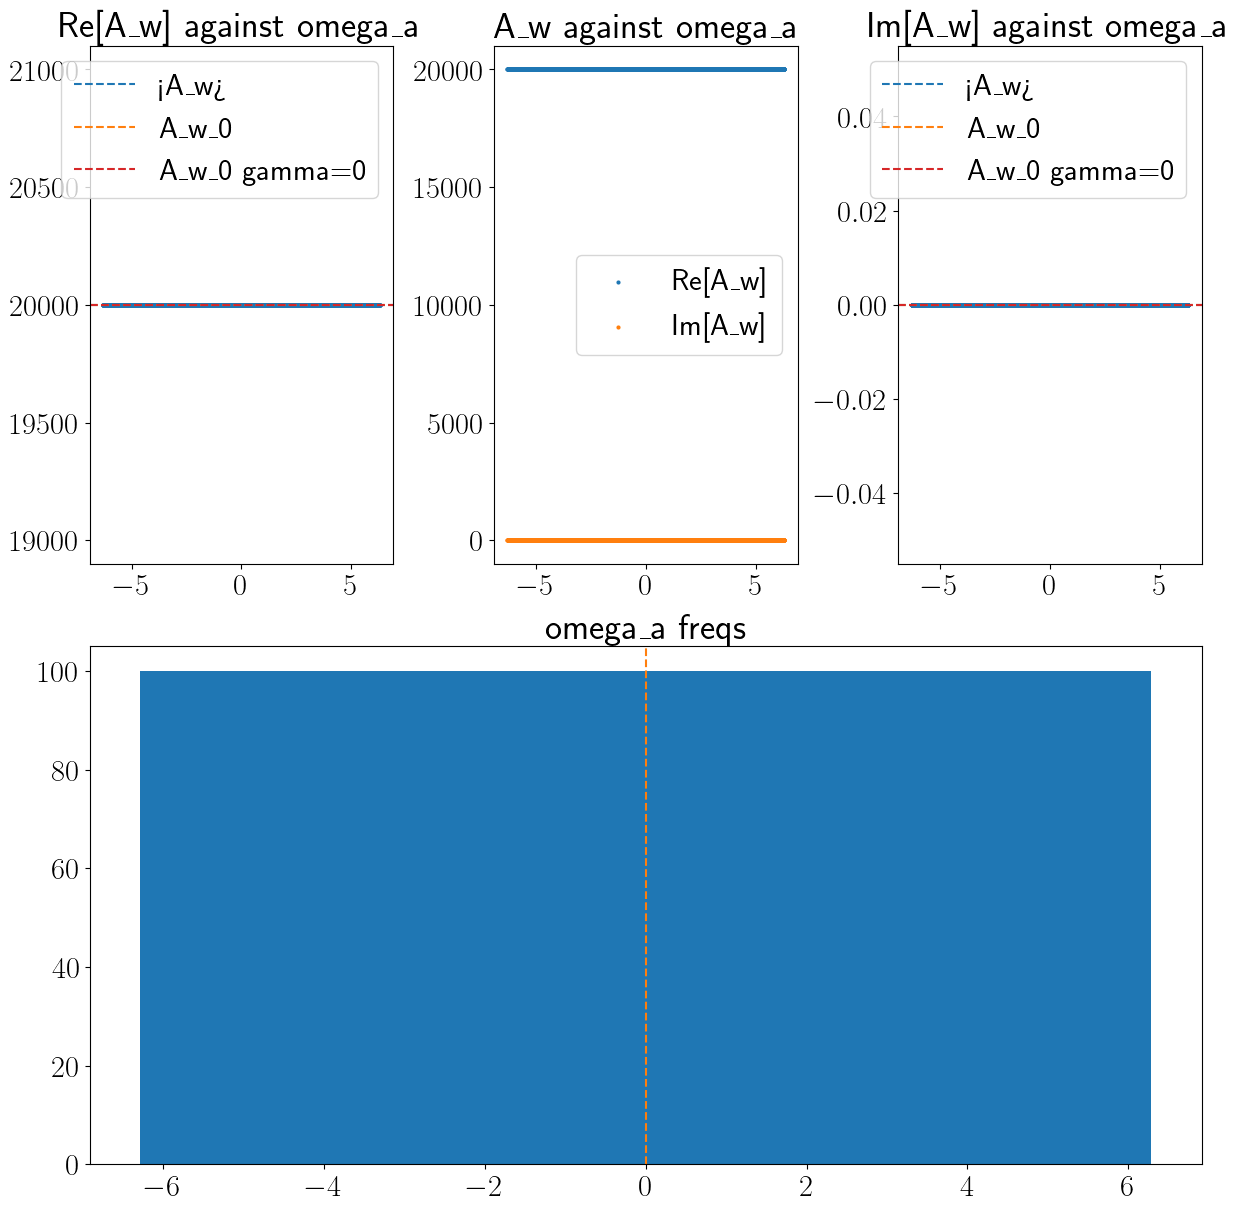

In [7]:
# Across all omega_as
omega_a_samples = int(1e4)

params['omega_as'] = np.linspace(-2 * np.pi, 2 * np.pi, omega_a_samples)
params['omega_a_0'] = 0 # 2 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 0
params['g'] = 1

results = wv_pipeline(params, False)
plot_fixed_results(results)

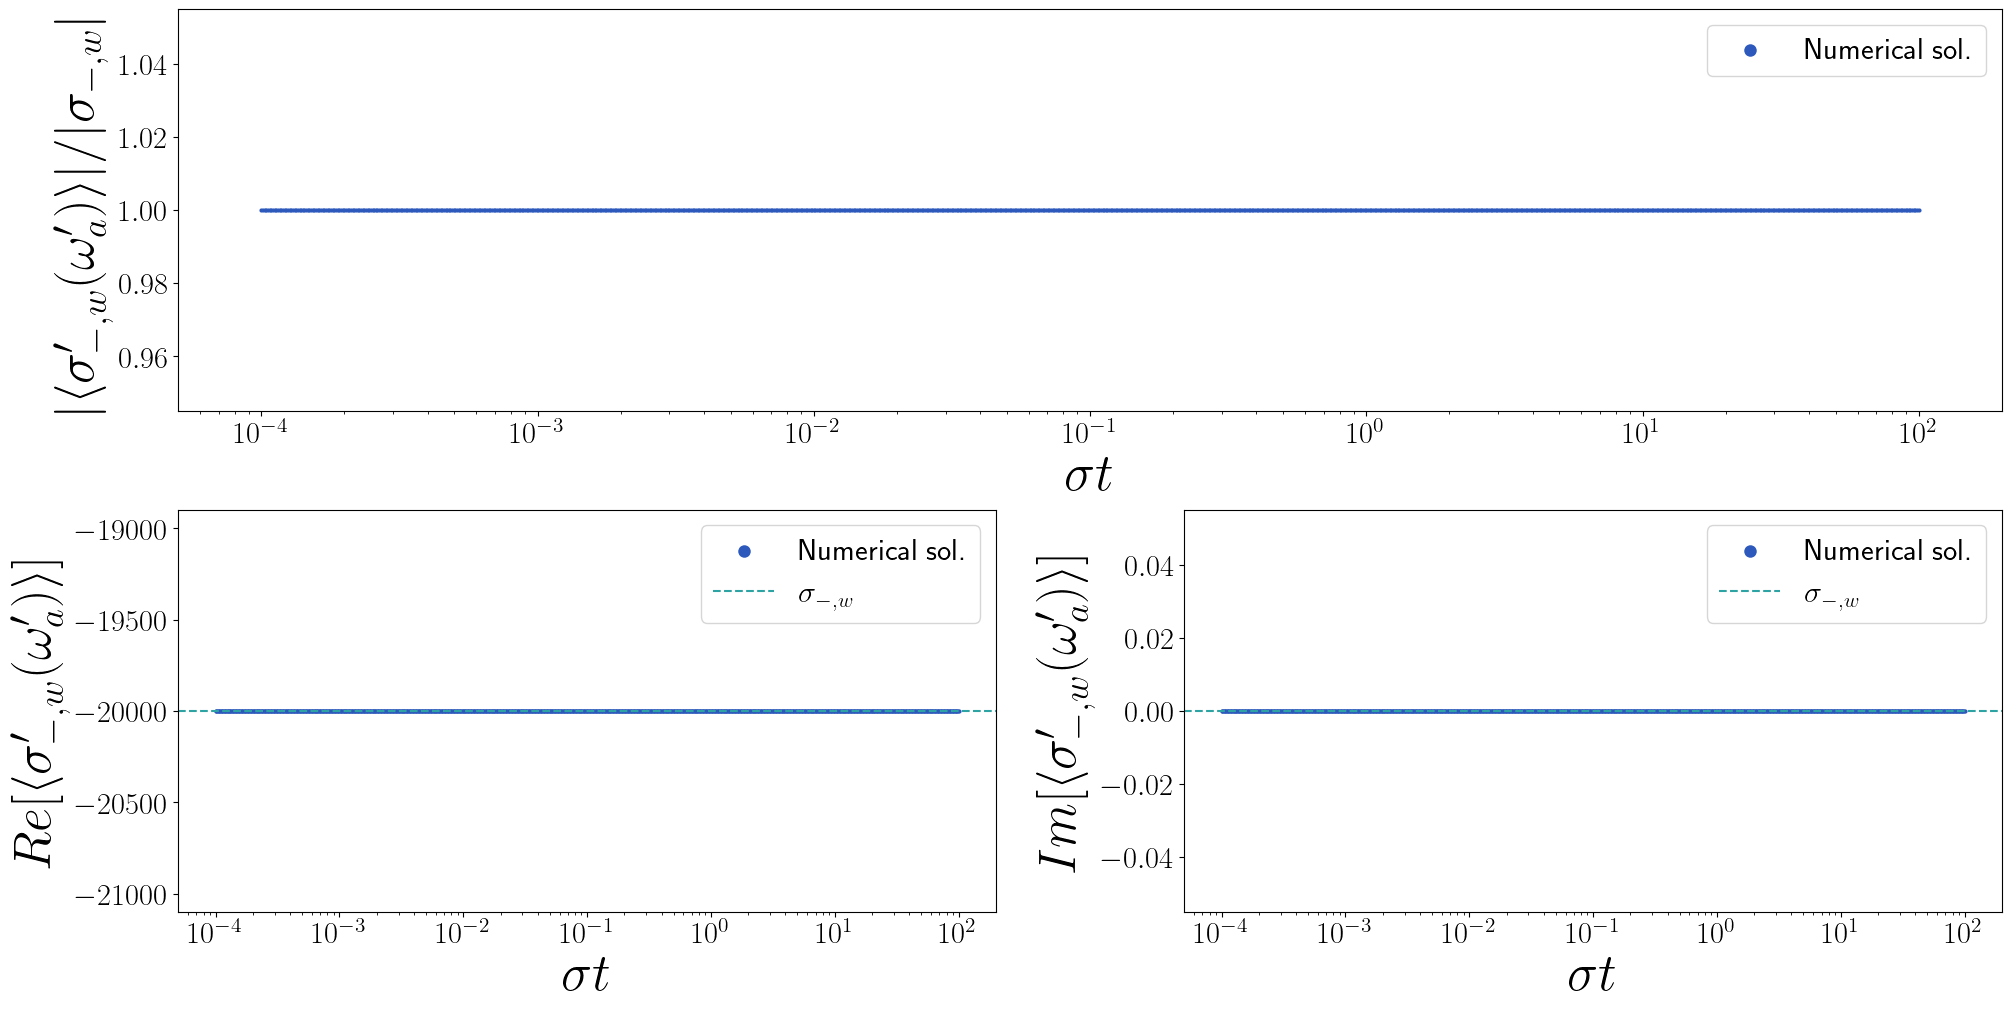

In [61]:
# Gaussian disorder distribution
omega_a_samples = int(1e4)
sigma_samples = int(1e3)
sigmas = np.geomspace(1e-4, 1e2, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

results = wv_pipeline(params, field_quads=False)
plot_against_sigma(results, log_xscale=True, plot_solution=False)

In [48]:
delta = 1e-4
params['u'] = np.array([0,0,1])
params['v'] = np.array([0,np.sin(delta),-np.cos(delta)])
params['m']=  np.array([1,-1j,0])/2

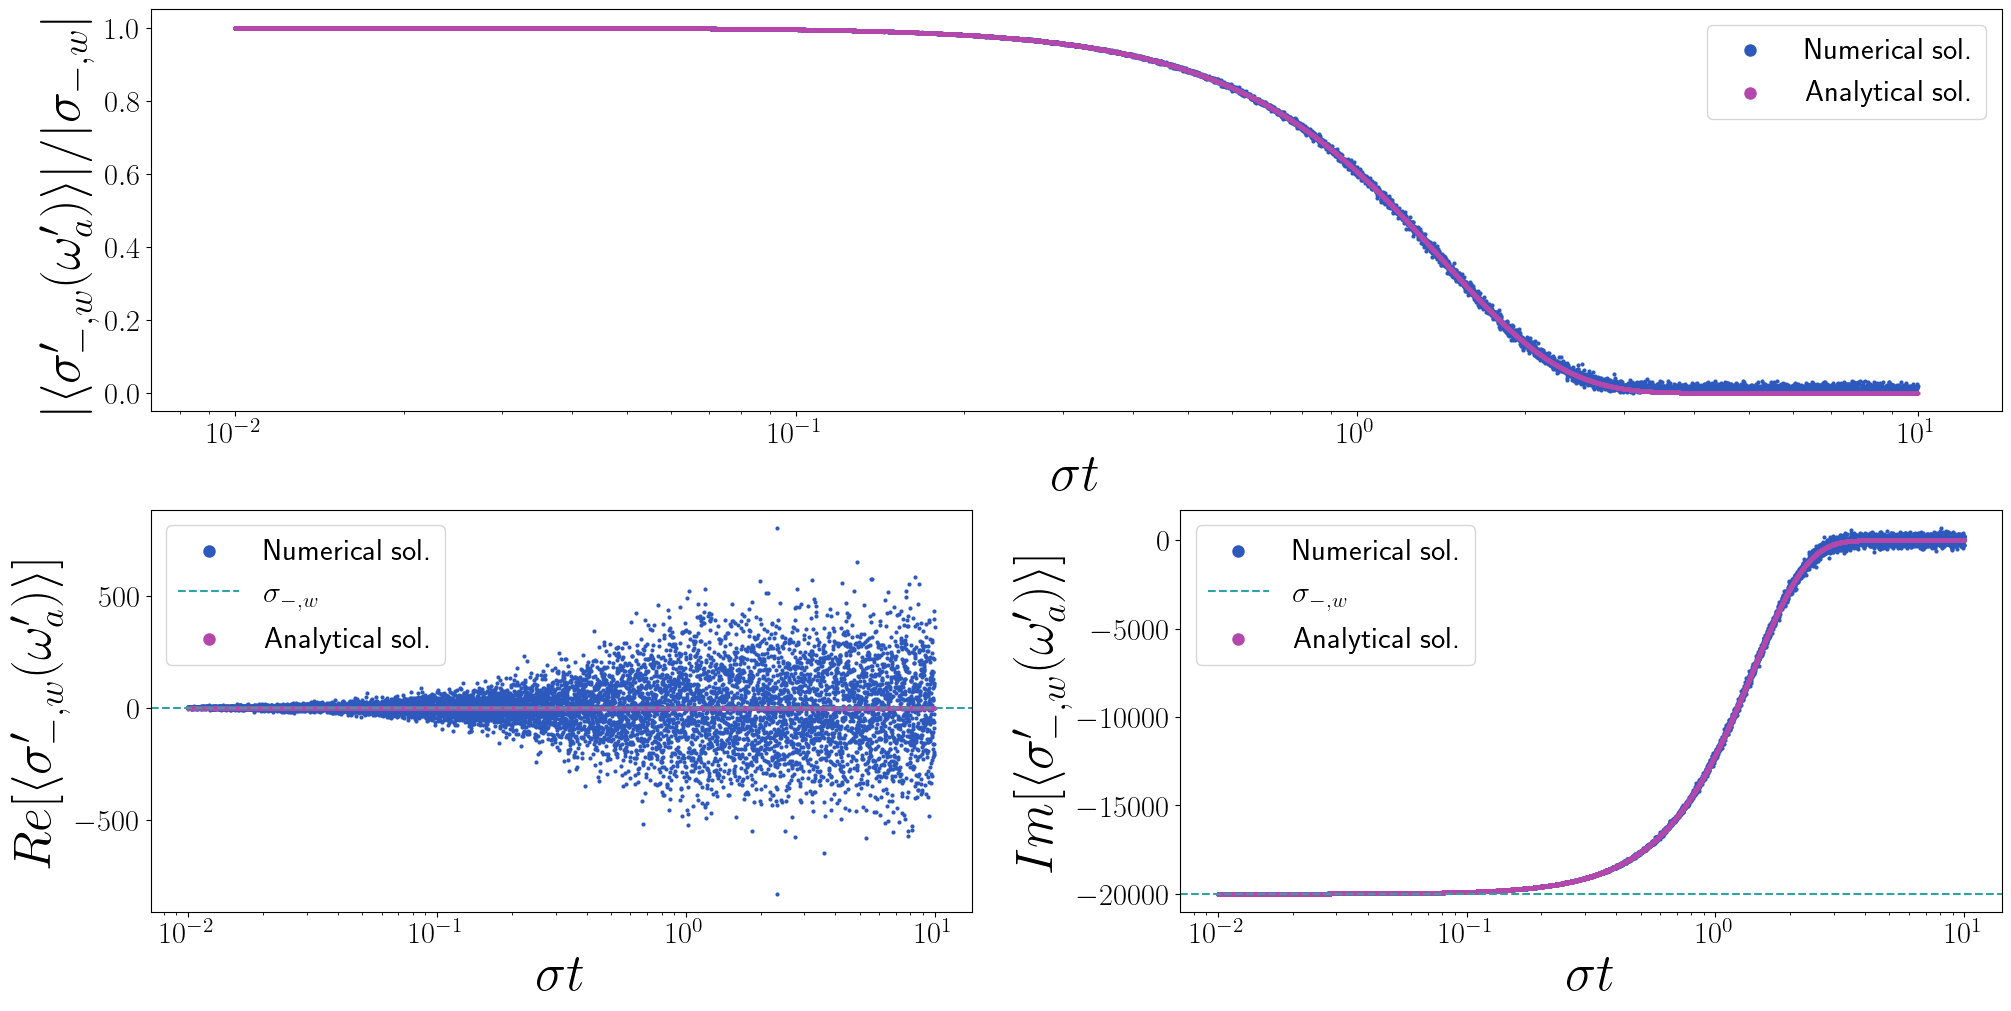

In [58]:
# Gaussian disorder distribution
omega_a_samples = int(5e3)
sigma_samples = int(1e4)
sigmas = np.geomspace(1e-2, 1e1, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

results = wv_pipeline(params, field_quads=False)
plot_against_sigma(results, log_xscale=True, plot_solution=True)

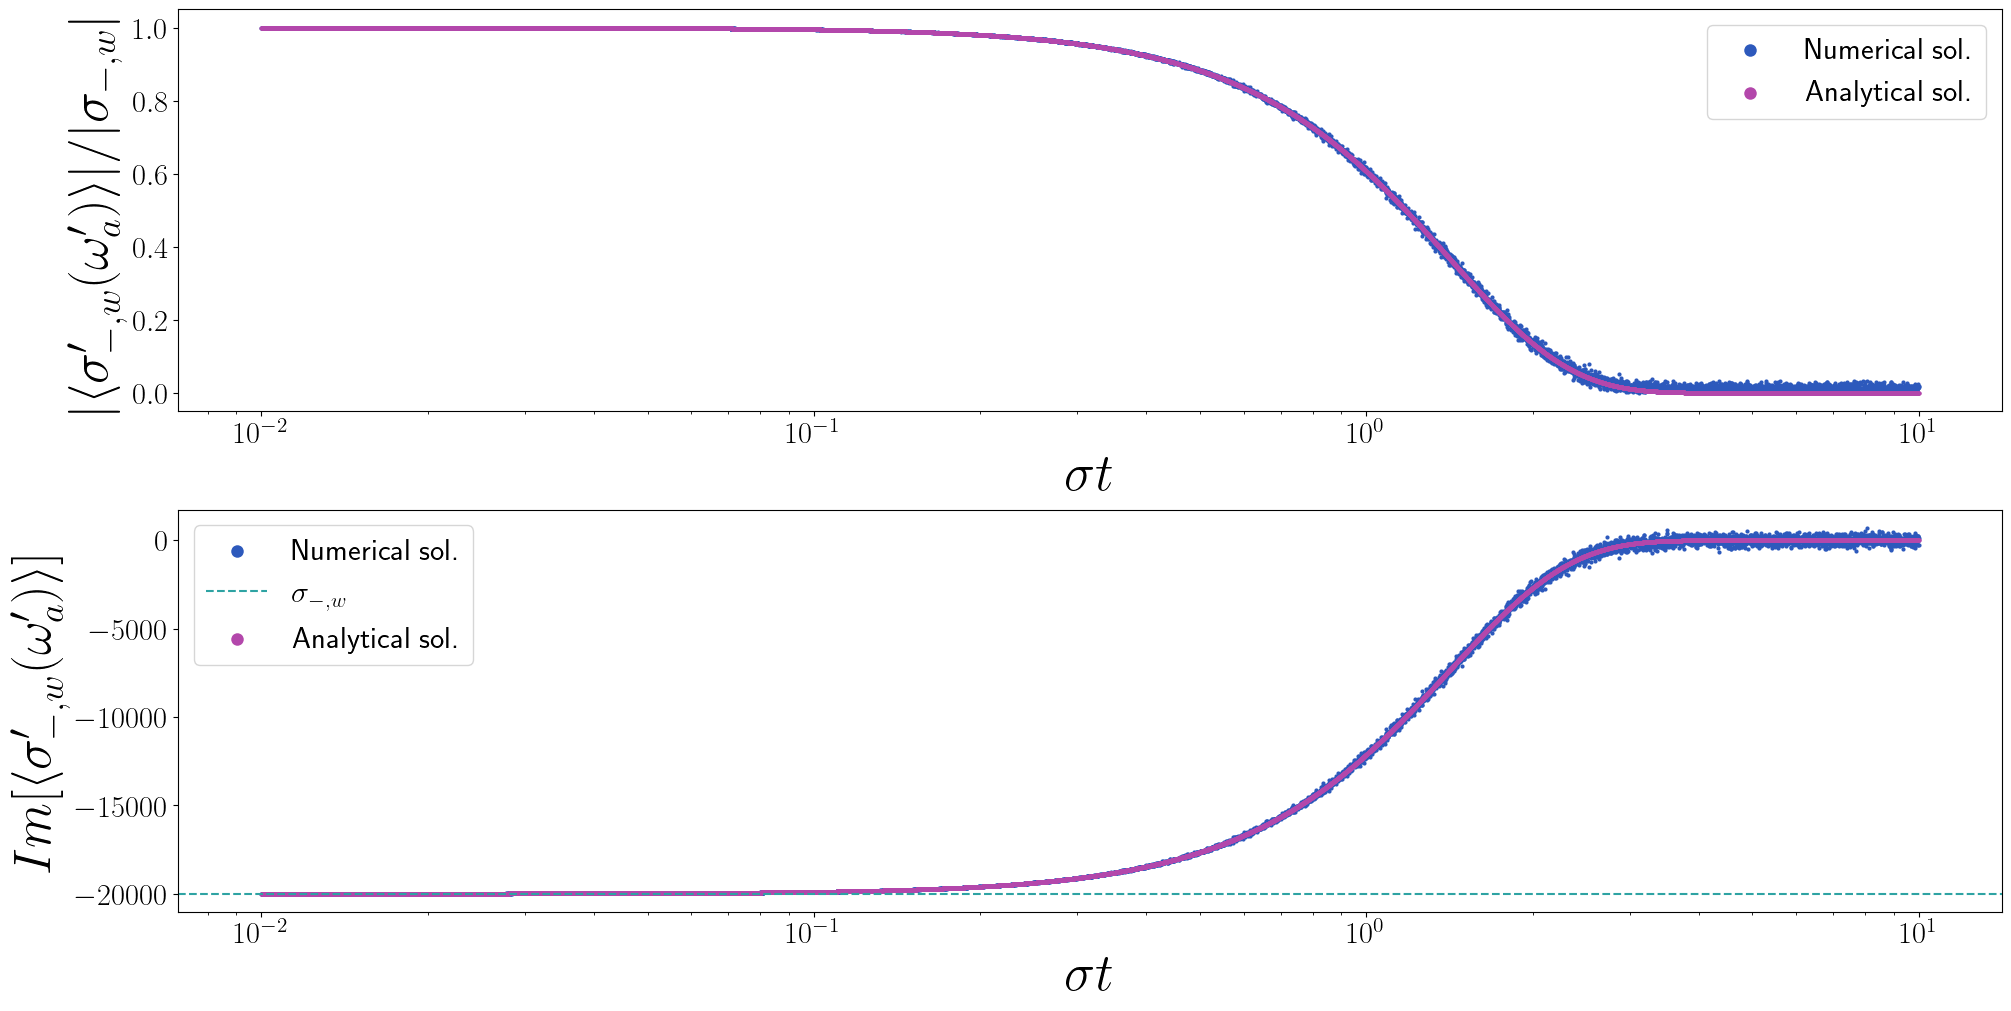

In [59]:
plot_against_sigma(results, plot_real=False, log_xscale=True, plot_solution=True)

In [18]:
delta = 1e-4
params['delta']=delta
params['u'] = np.array([0,1,0])
params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
params['m']=  np.array([1,-1j,0])/2

In [19]:
# Gaussian disorder distribution
omega_a_samples = int(5e3)
sigma_samples = int(1e4)
sigmas = np.geomspace(1e-6, 1e-1, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

results = wv_pipeline(params, field_quads=False)

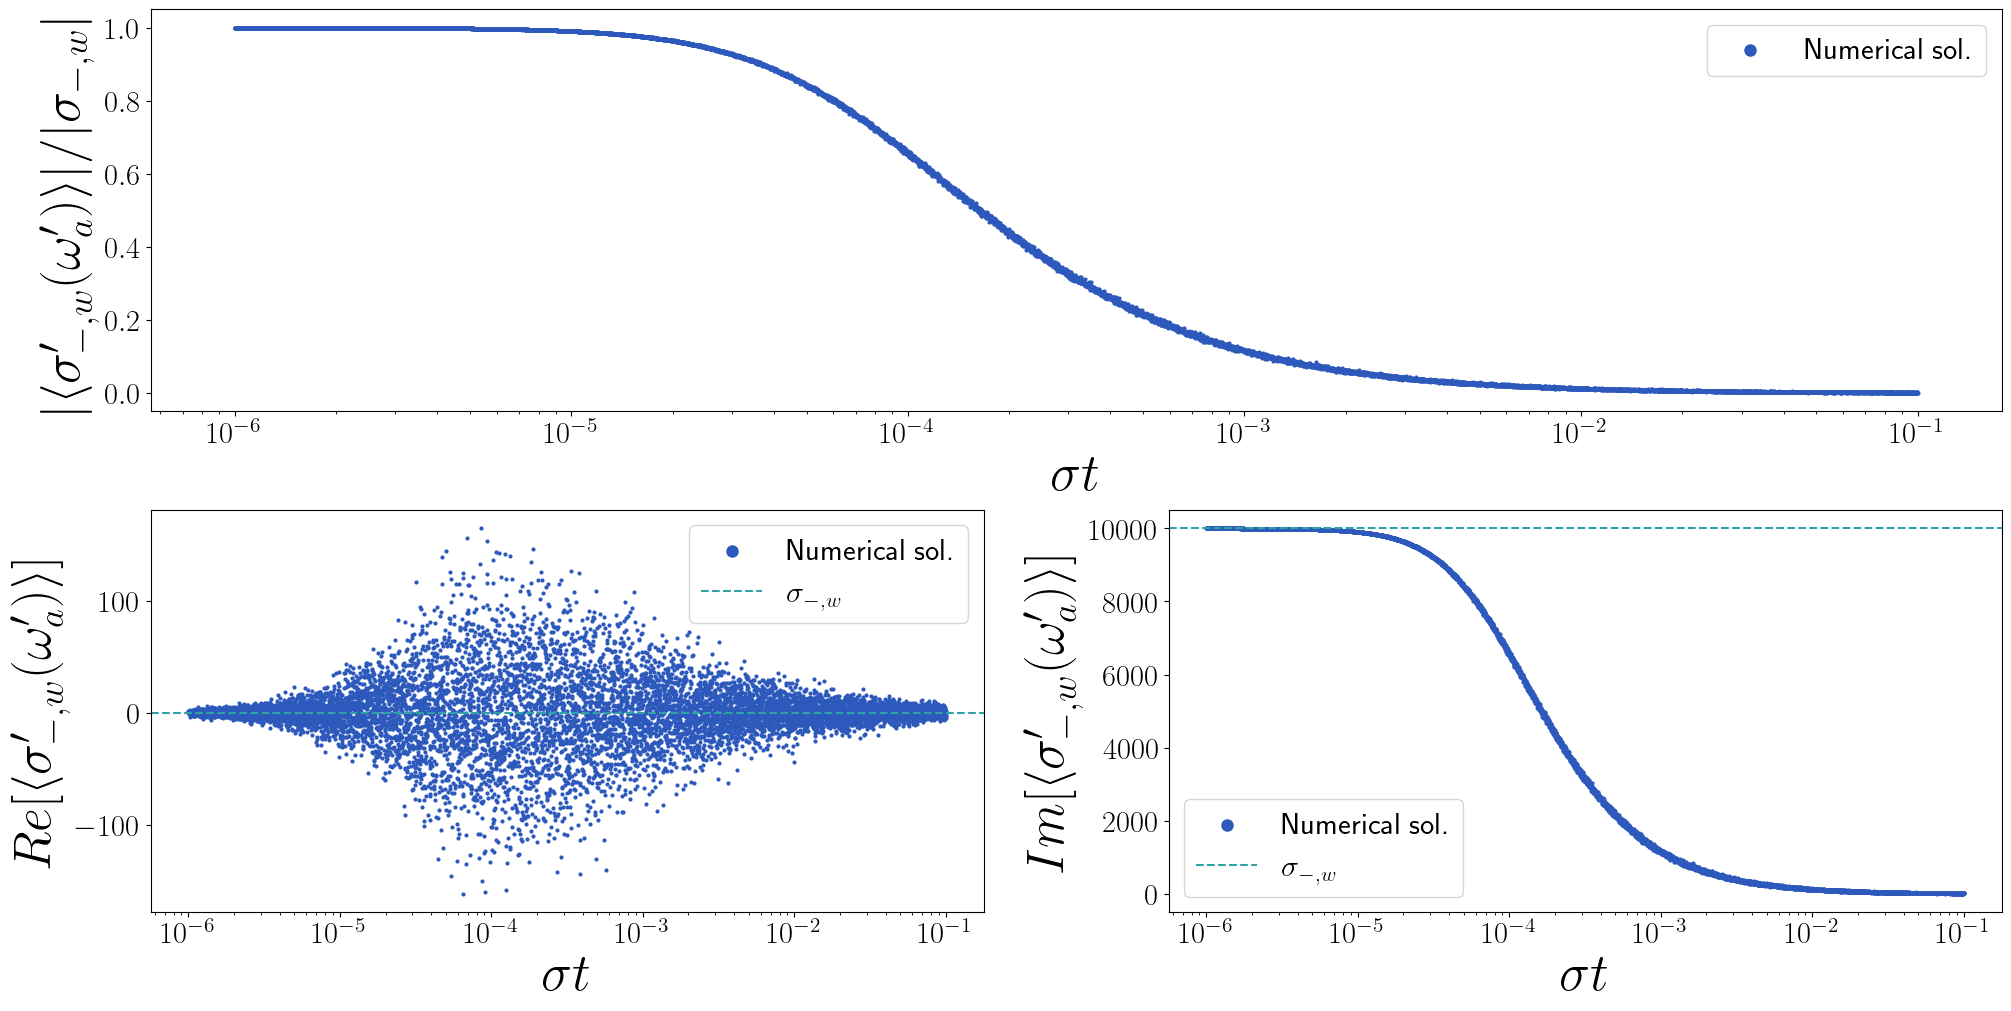

In [20]:
plot_against_sigma(results, plot_wv_0=True, log_xscale=True)

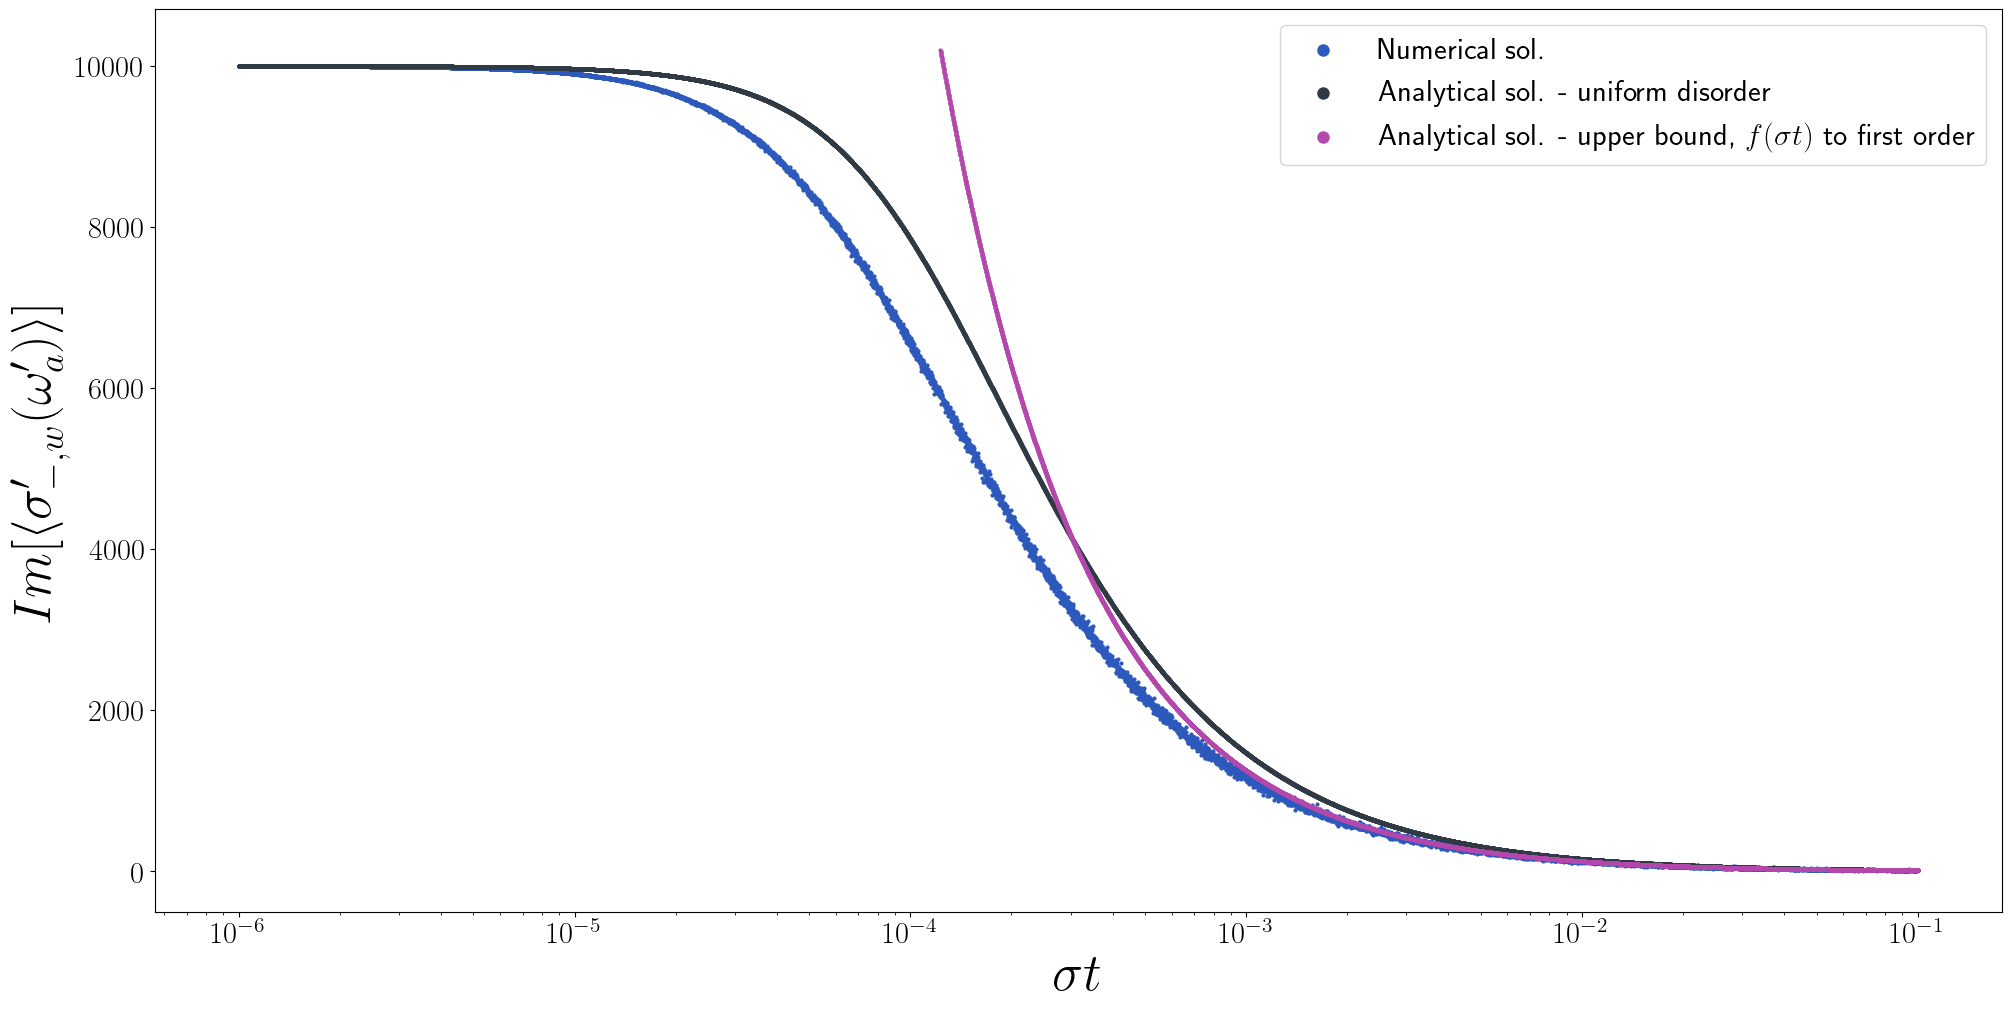

In [21]:
plot_im_against_sigma(results, plot_solutions=True, log_xscale=True)

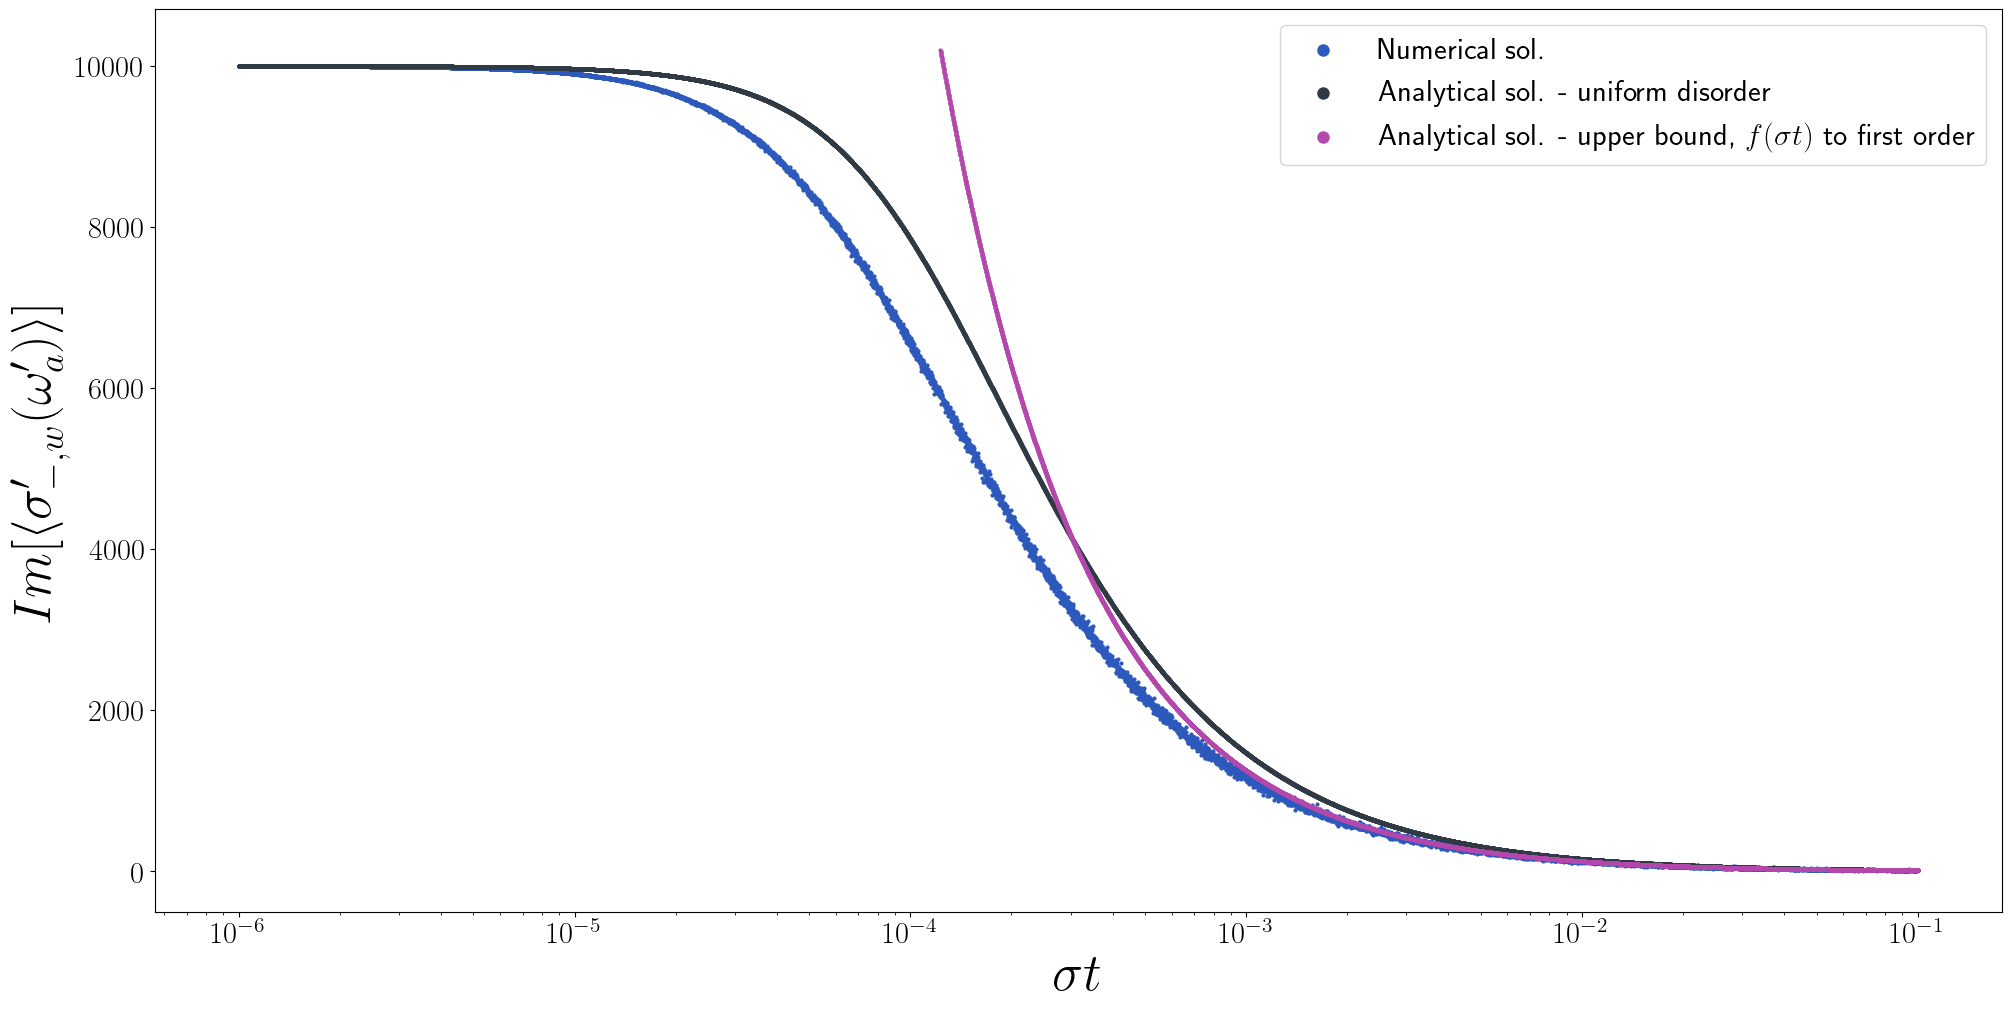

In [22]:
plot_im_against_sigma(results, plot_solutions=True, log_xscale=True)

In [23]:
omega_a_samples = int(2e4)
sigma_samples = int(2e3)
sigmas = np.geomspace(1e-7, 5, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

delta_results = {}
for delta_pow in [-1, -2, -3, -4, -5, -6]:
    print(delta_pow)
    delta = np.pow(10.0,delta_pow)
    params['delta']=delta
    params['u'] = np.array([0,1,0])
    params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
    params['m']=  np.array([1,-1j,0])/2

    delta_results[delta_pow] = wv_pipeline(params, field_quads=False)

-1
-2
-3
-4
-5
-6


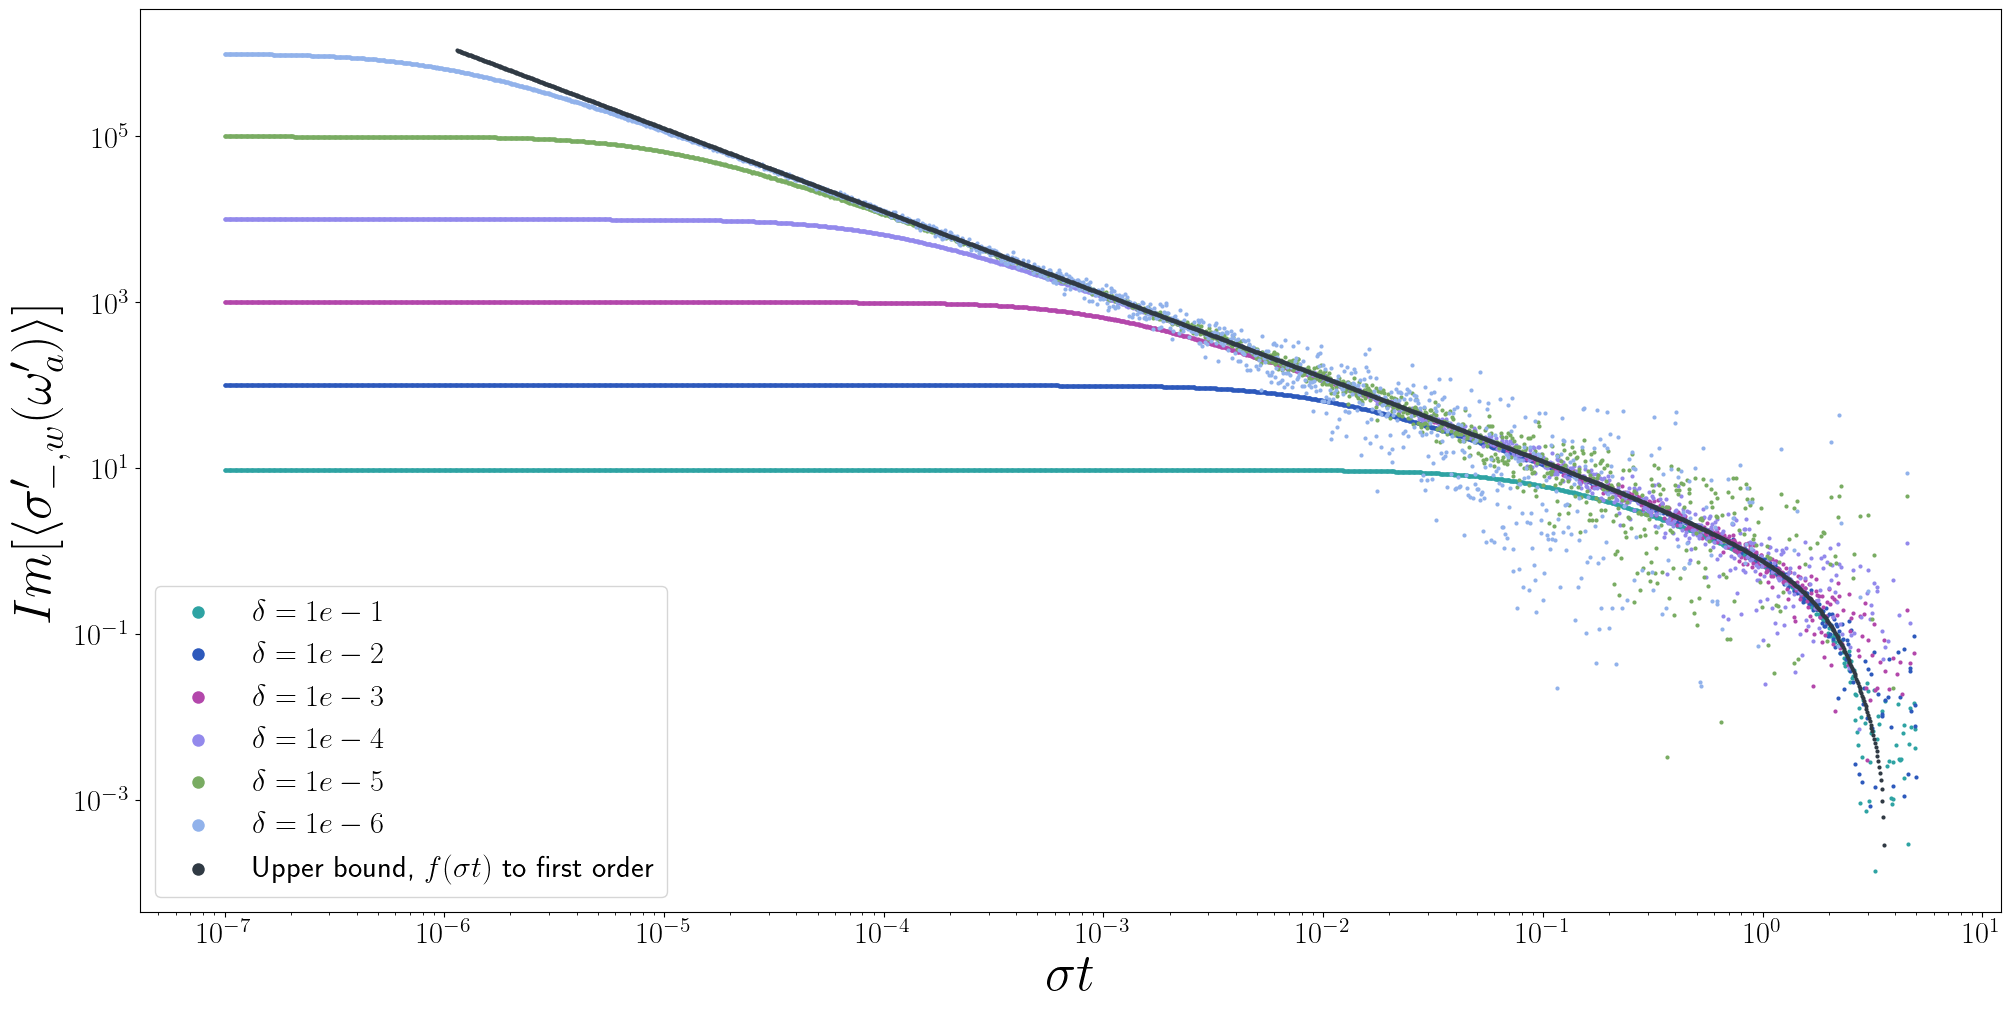

In [24]:
plot_im_deltas(delta_results, sigmas)

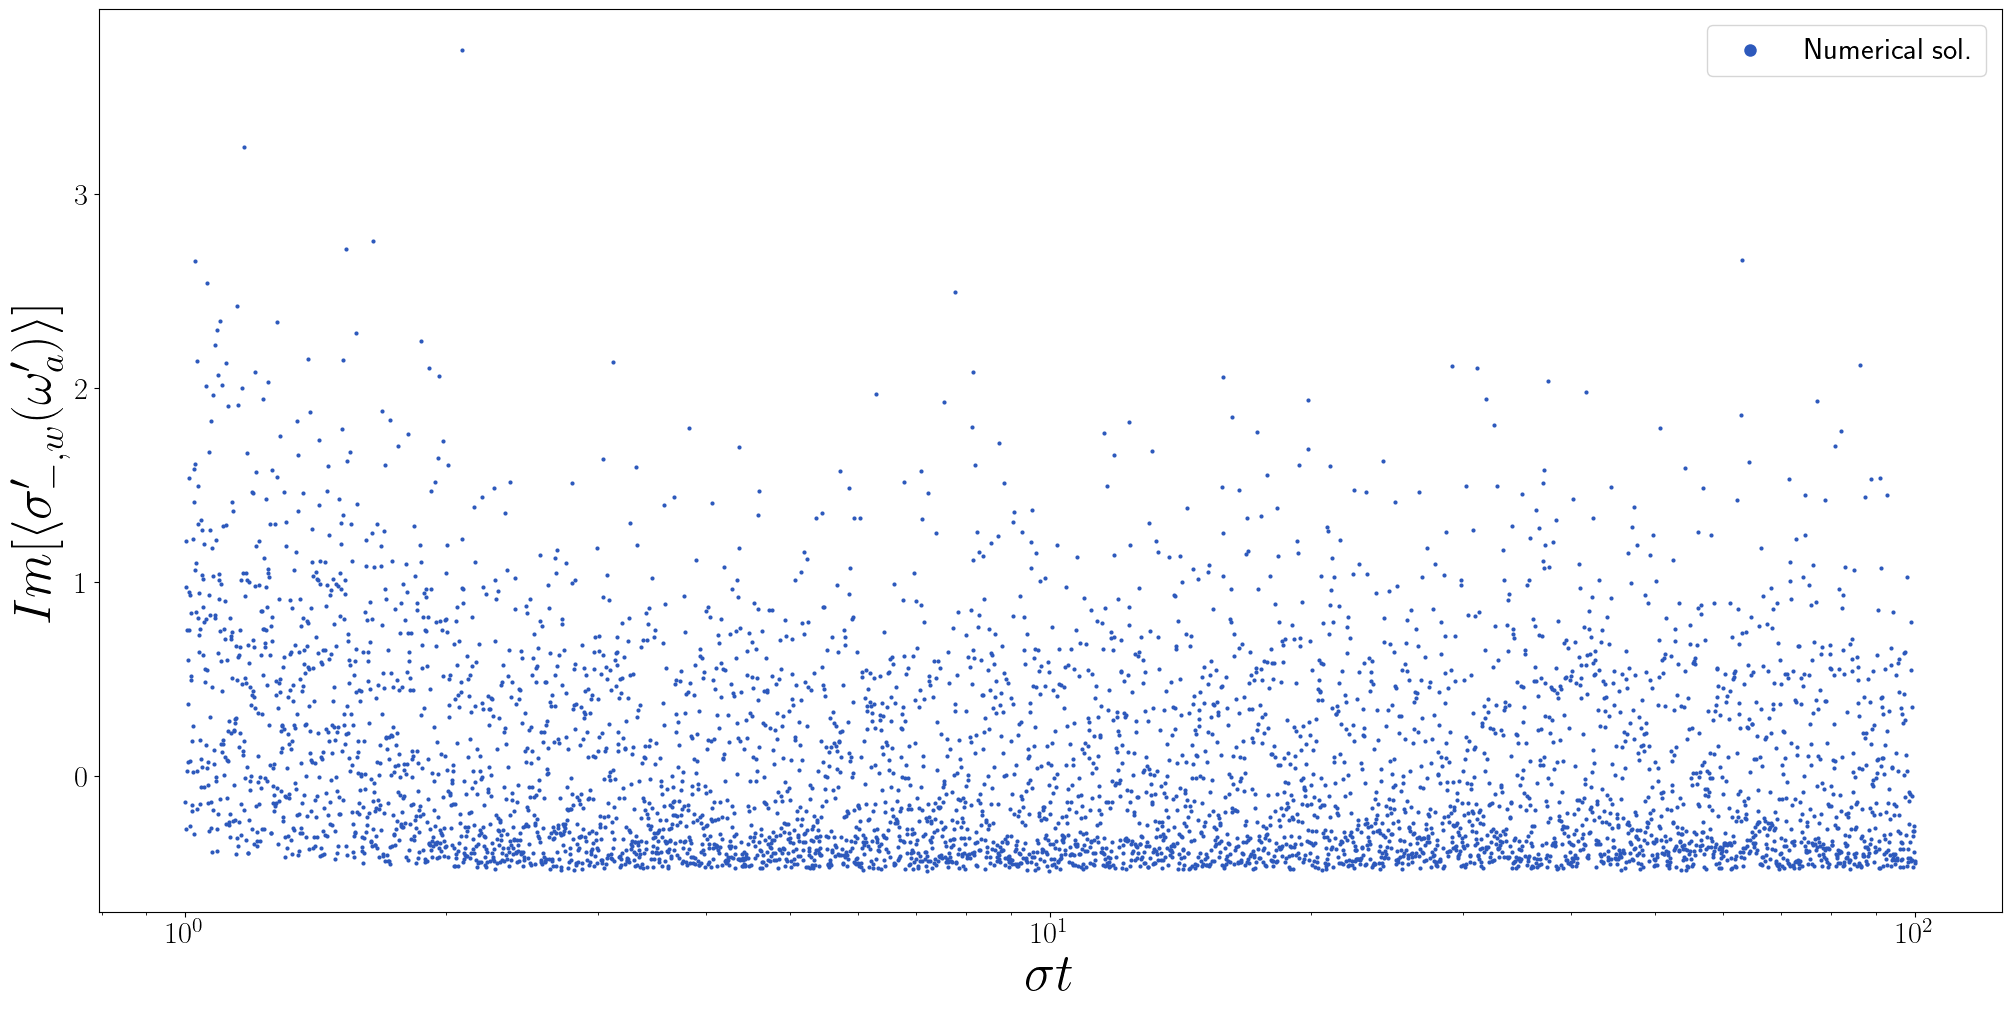

In [25]:
delta = 1e-4
params['delta']=delta
params['u'] = np.array([0,1,0])
params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder distribution
omega_a_samples = int(1e4)
sigma_samples = int(5e3)
sigmas = np.geomspace(1, 1e2, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

results = wv_pipeline(params, field_quads=False)
plot_im_against_sigma(results, plot_solutions=False, log_xscale=True)

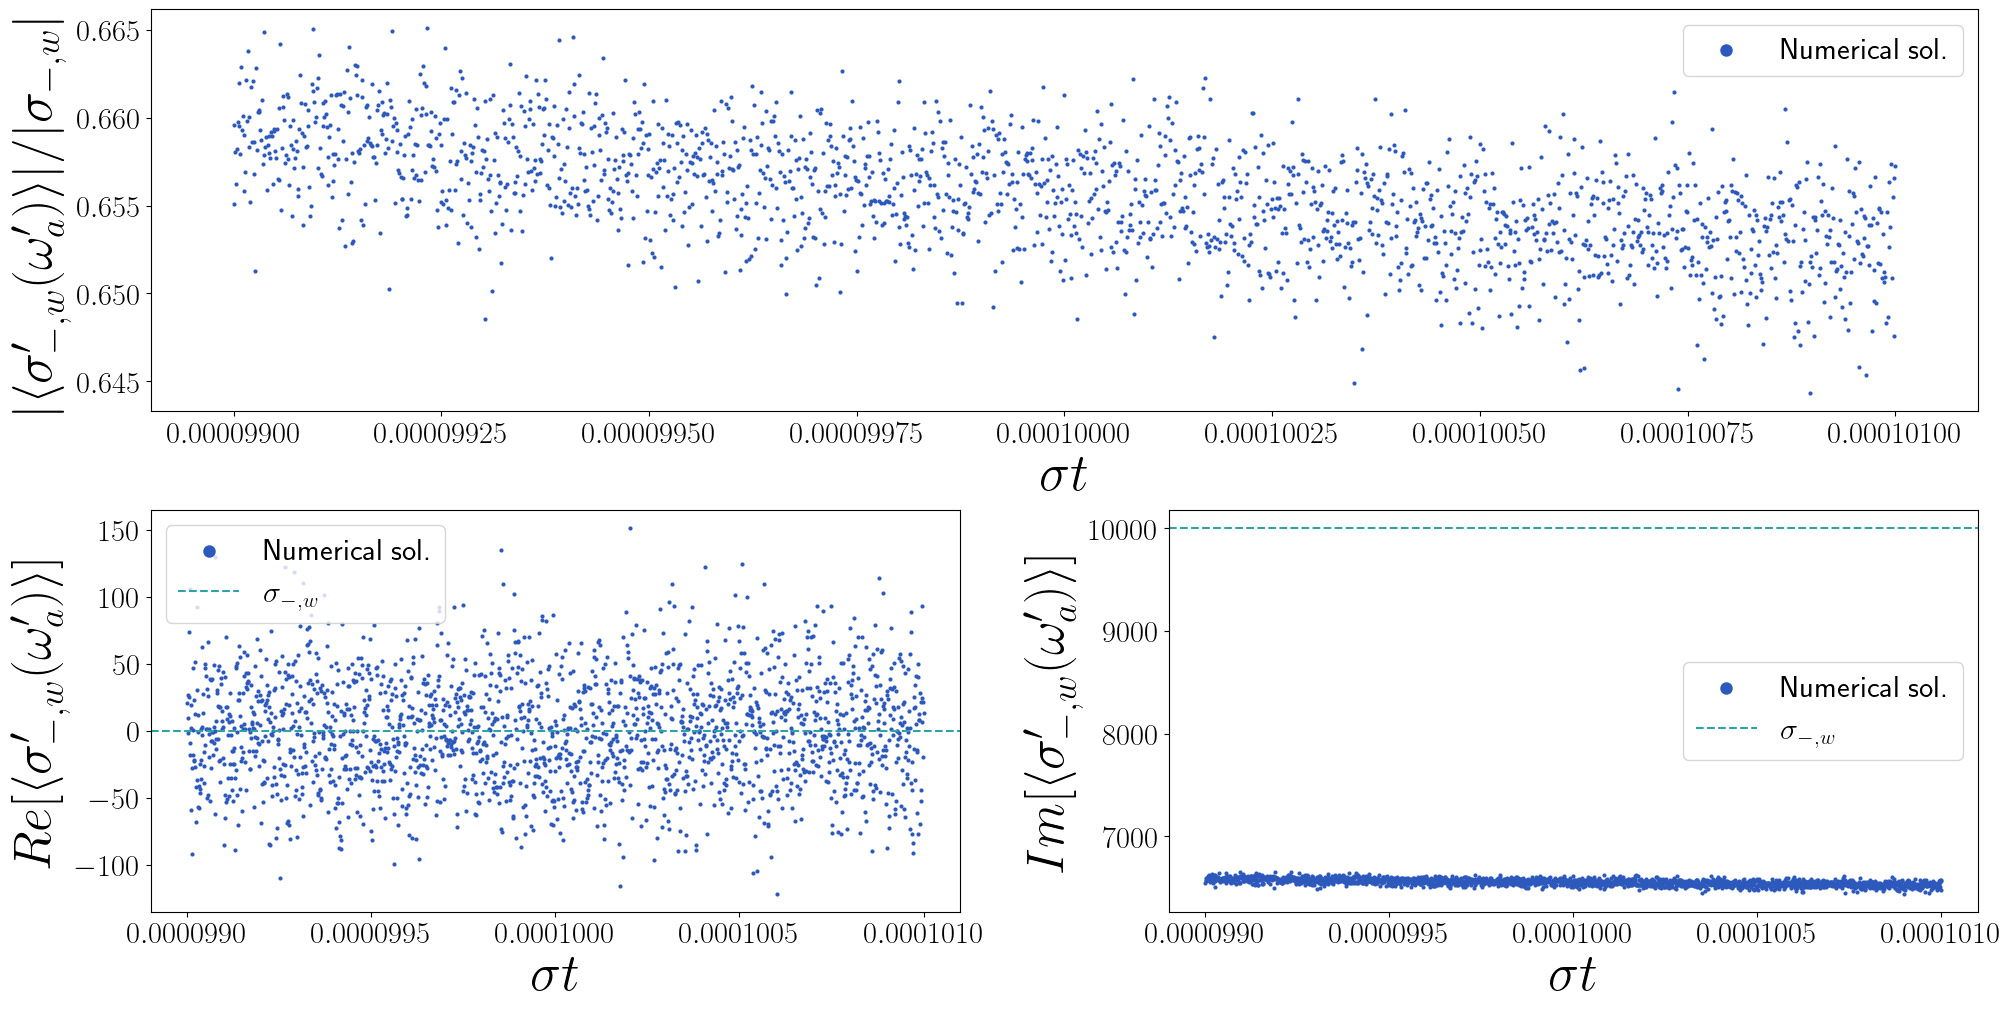

In [26]:
# Gaussian disorder distribution
omega_a_samples = int(1e4)
sigma_samples = int(2e3)
sigmas = np.linspace(9.9e-5, 1.01e-4, sigma_samples)

params['sigmas'] = sigmas
params['omega_as'] = generator.normal(0, sigmas.reshape(-1, 1), (sigma_samples, omega_a_samples))
params['omega_a_0'] = 0
params['t'] = 1
params['tau'] = 0
params['gamma'] = 0

results = wv_pipeline(params, field_quads=False)
plot_against_sigma(results)

In [80]:
delta = 1e-4
params['u'] = np.array([-np.sin(delta),0,np.cos(delta)])
params['v'] = np.array([0,0,-1])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder, plot against tau
omega_a_samples = np.int64(1e2)
tau_samples = np.int64(1e4)

sigma = [1]

params['omega_as'] = generator.normal(0, sigma, omega_a_samples)
params['omega_a_0'] = 0
params['sigmas'] = sigma
params['t'] = 1
params['tau'] = np.geomspace(1e-12, 1e-4, tau_samples)
params['gamma'] = 1

results = wv_pipeline(params, field_quads=False)

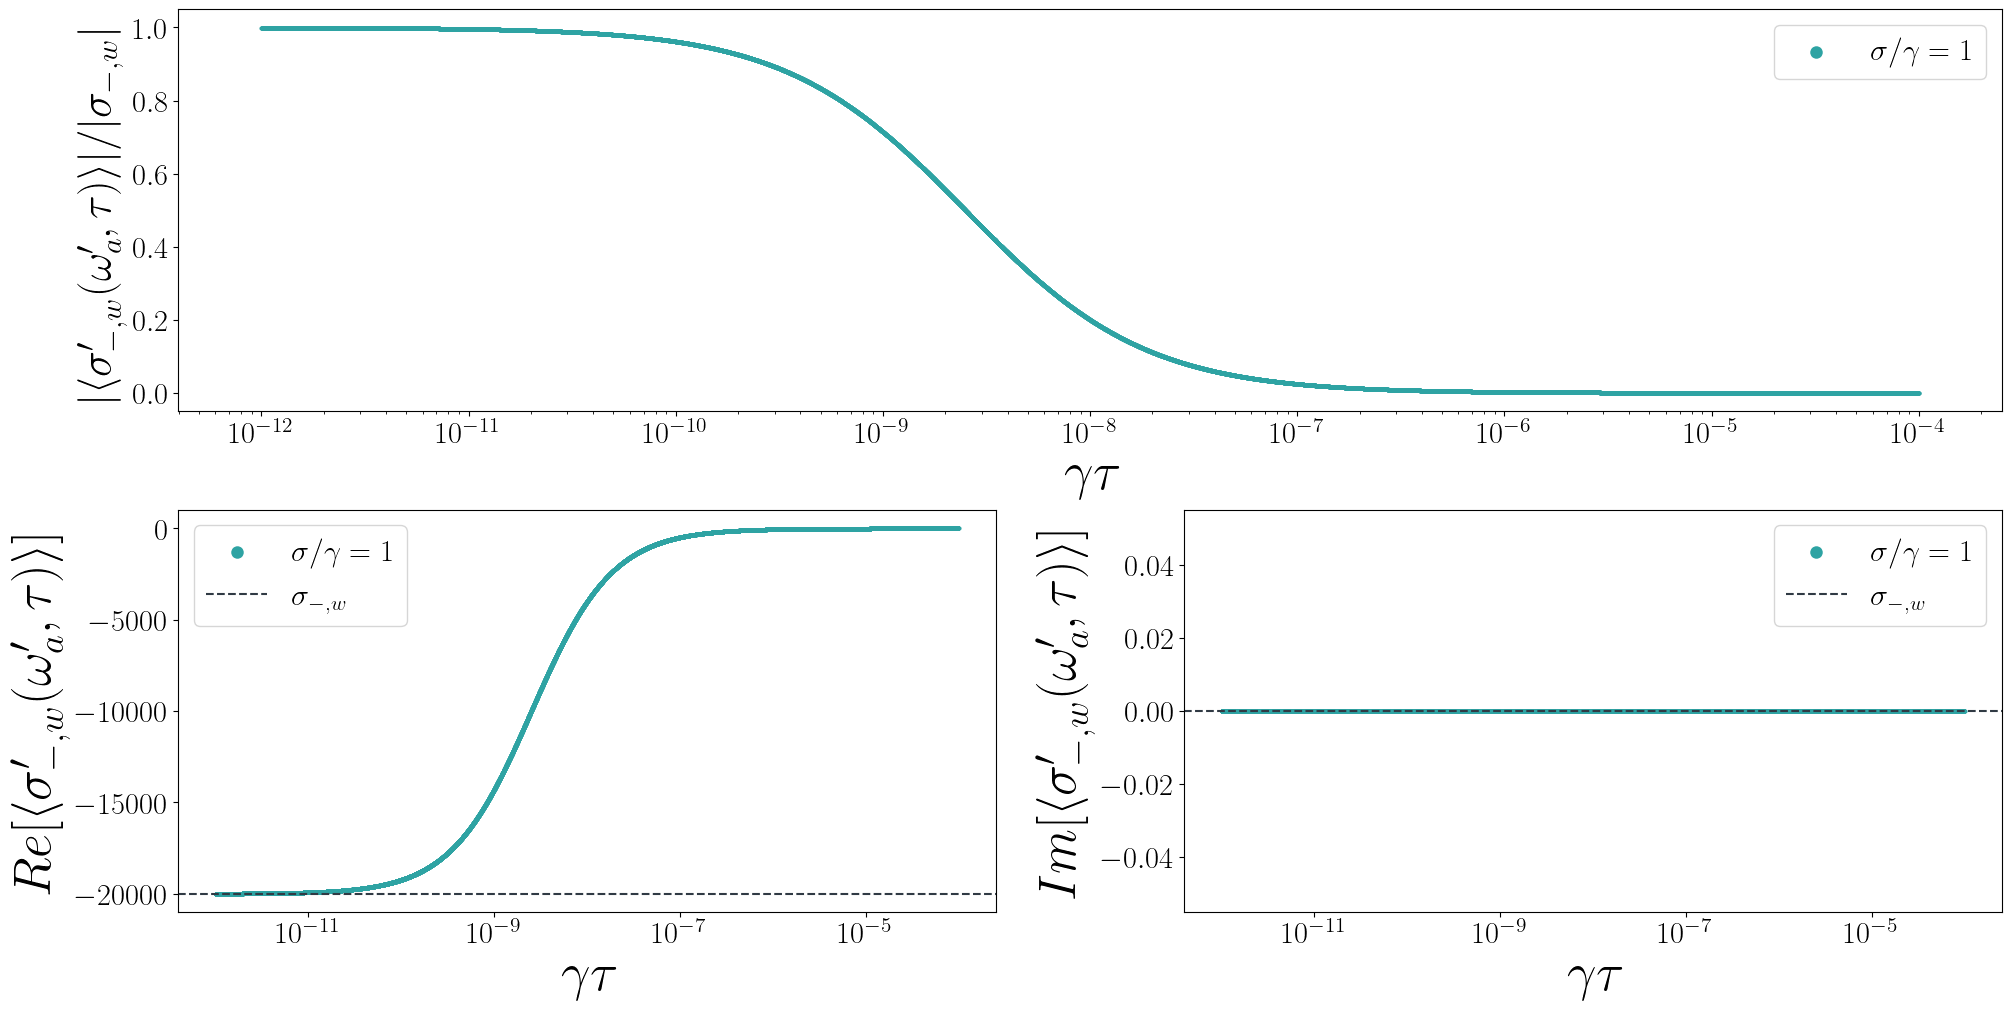

In [81]:
plot_against_tau(results, show_wv_0_0=True, plot_wv_0s=False, log_xscale=True, log_yscale=False)

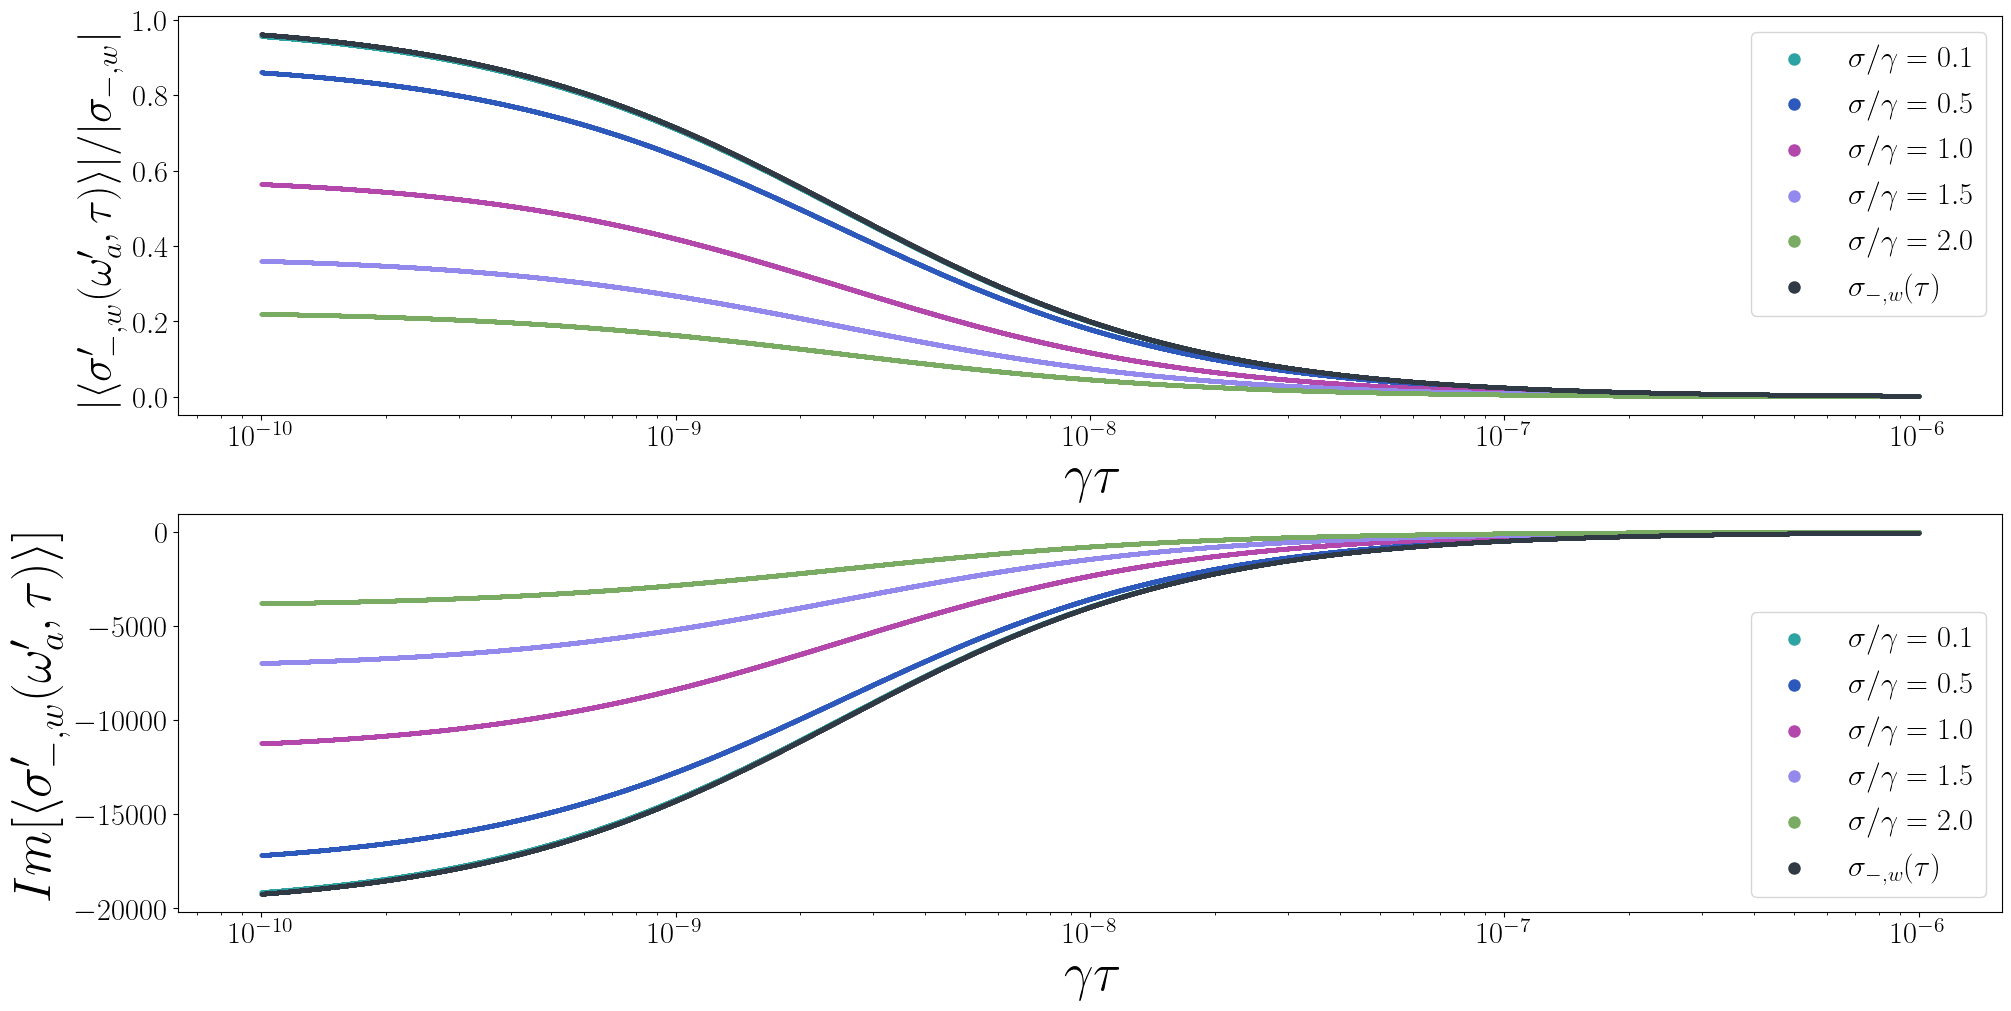

In [62]:
params['u'] = np.array([0,0,1])
params['v'] = np.array([0,np.sin(delta),-np.cos(delta)])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder, plot against tau
omega_a_samples = np.int64(1e2)
tau_samples = np.int64(1e4)

sigmas = np.array([1e-1, 5e-1, 1, 1.5, 2])

params['omega_as'] = generator.normal(0, sigmas.reshape(-1,1), (*sigmas.shape, omega_a_samples))
params['omega_a_0'] = 0
params['sigmas'] = sigmas
params['t'] = 1
params['tau'] = np.geomspace(1e-10, 1e-6, tau_samples)
params['gamma'] = 1

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, plot_real=False, show_wv_0_0=False, plot_wv_0s=True, log_xscale=True, log_yscale=False)

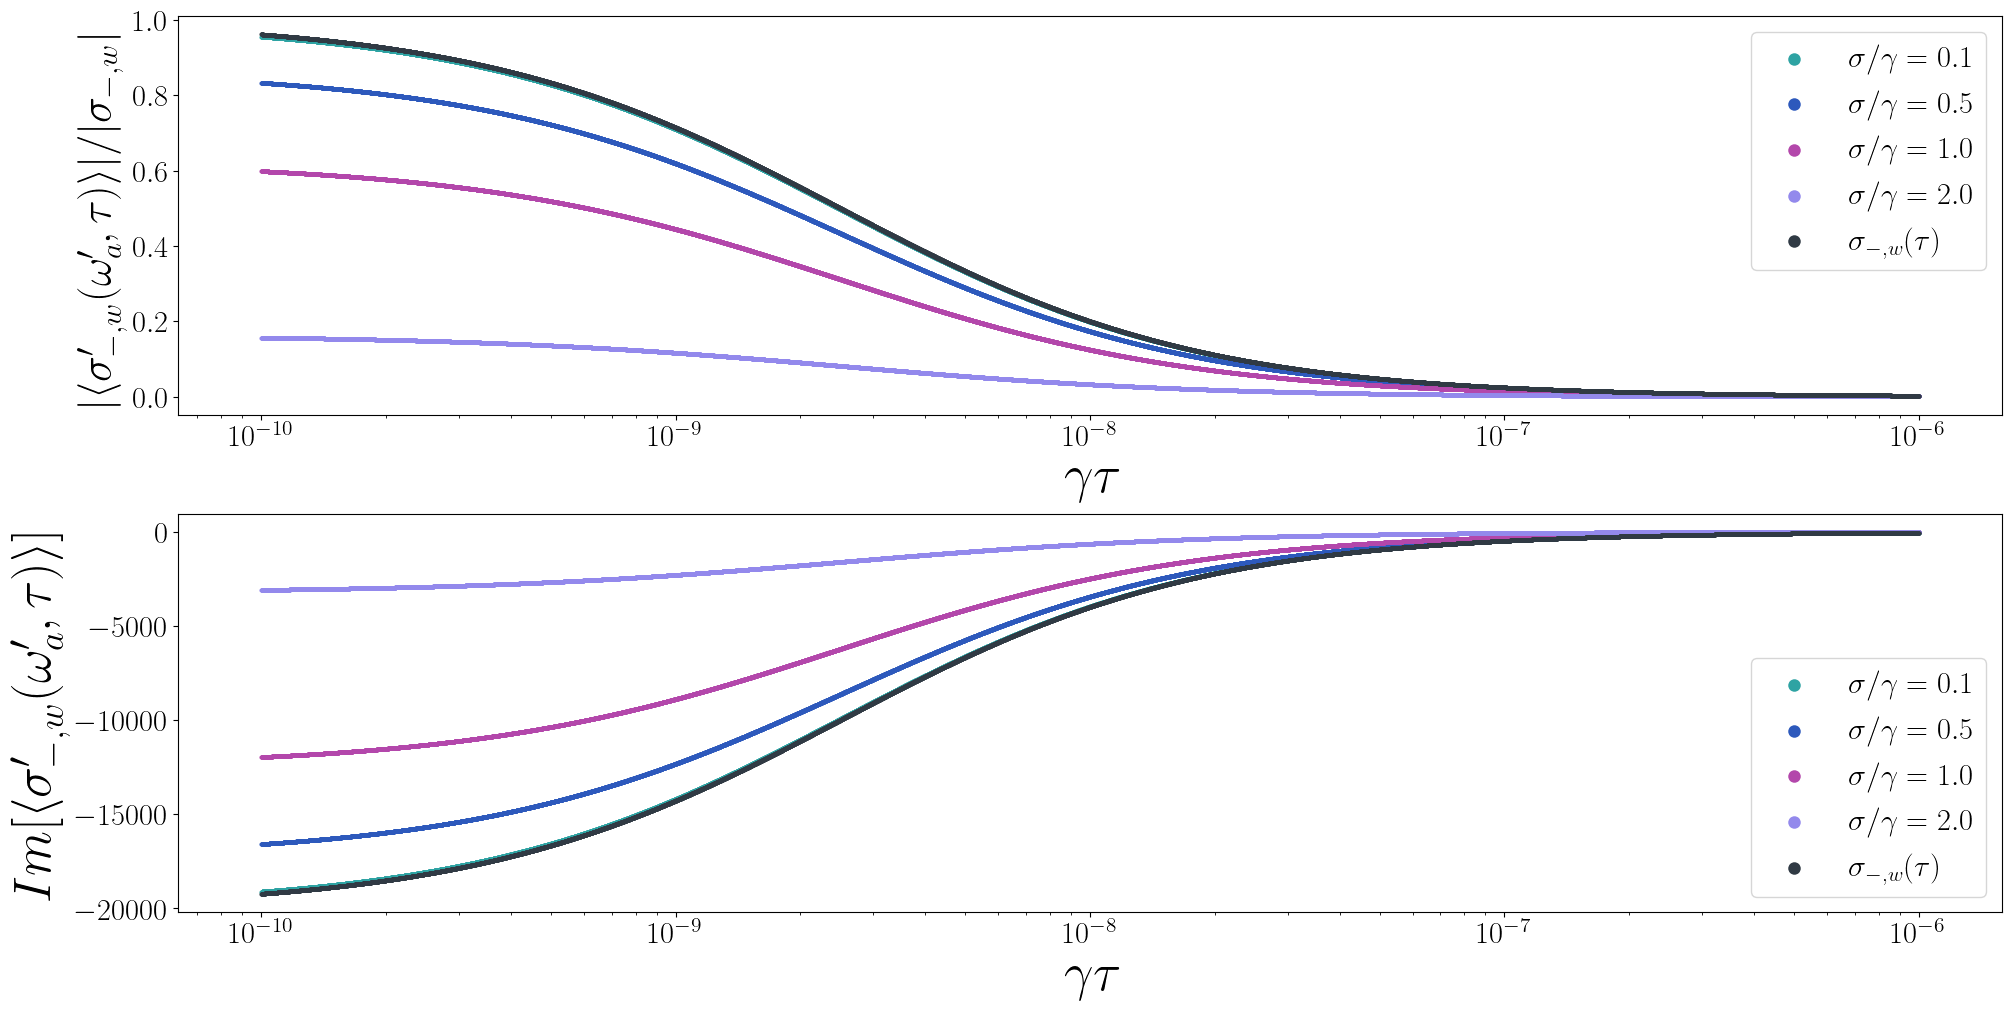

In [30]:
plot_against_tau(results, plot_real=False, show_wv_0_0=False, plot_wv_0s=True, log_xscale=True, log_yscale=False)

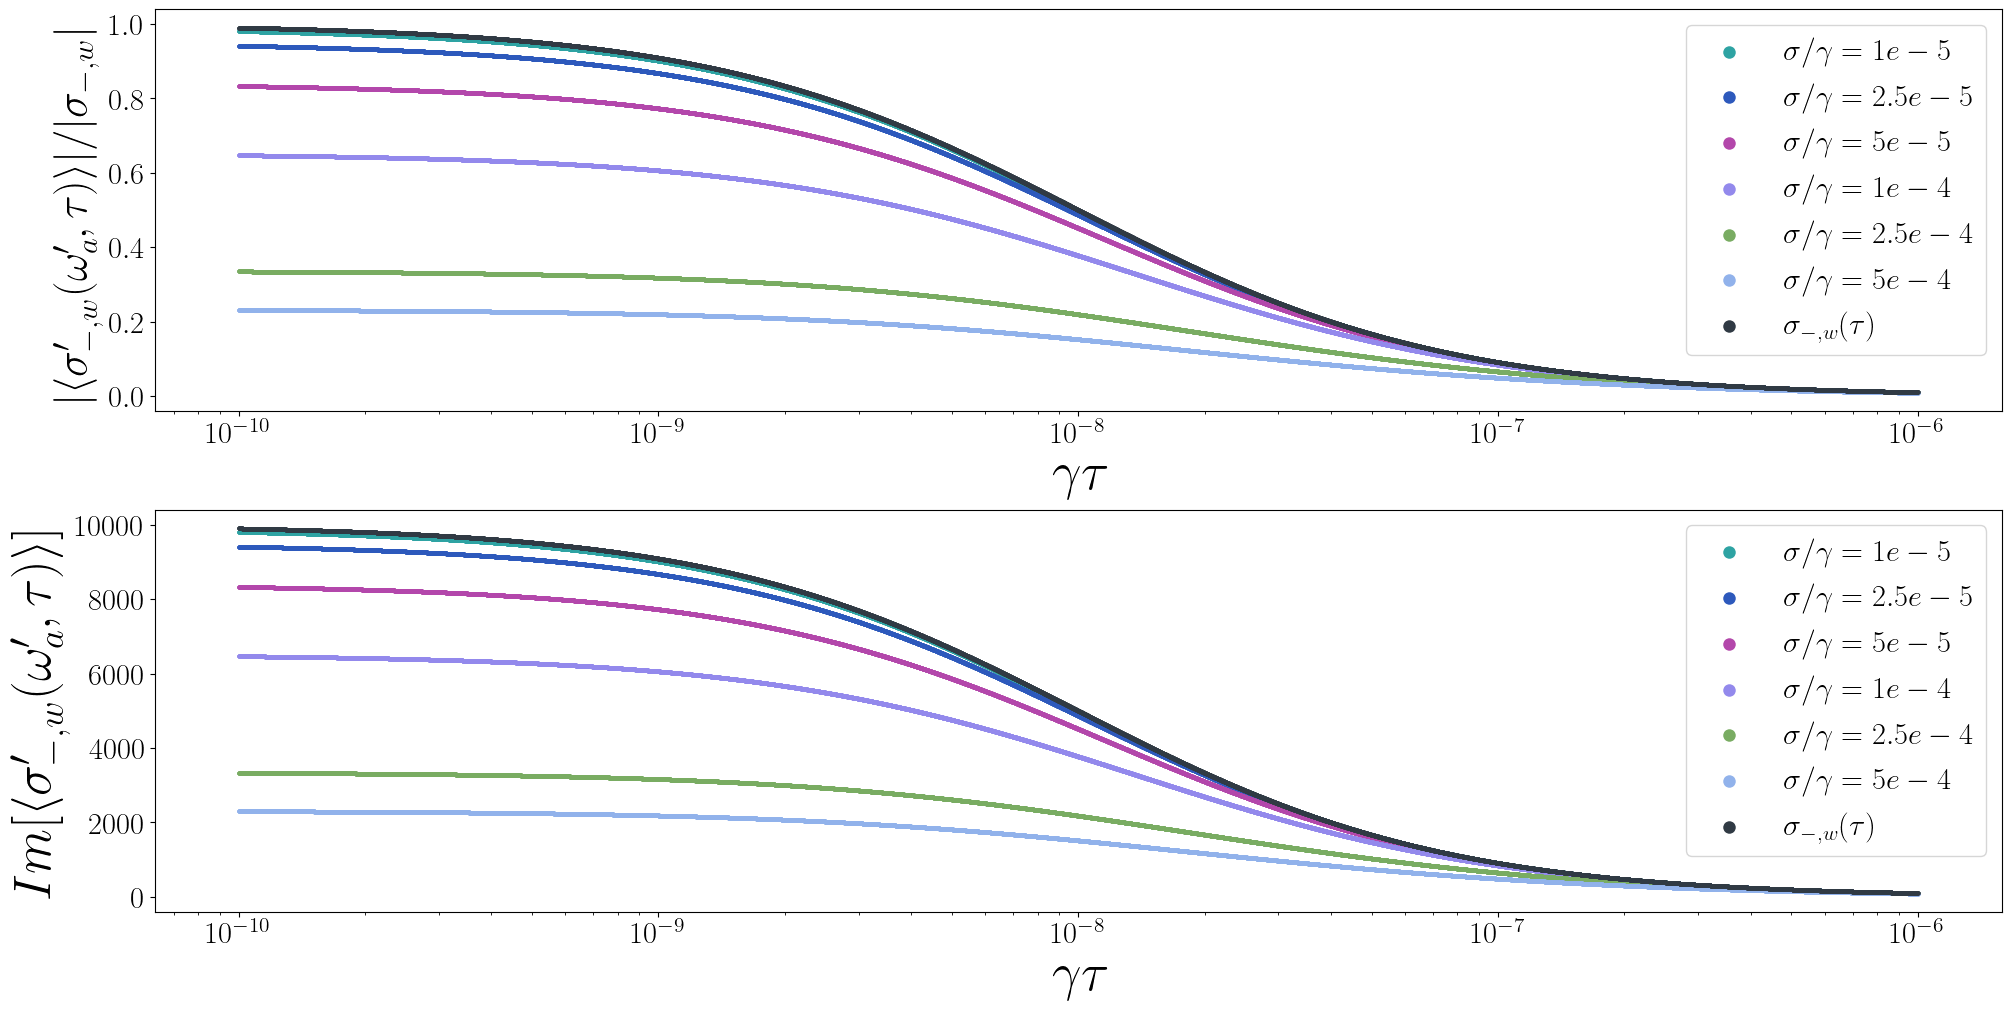

In [64]:
delta = 1e-4
params['u'] = np.array([0,1,0])
params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder, plot against tau
omega_a_samples = np.int64(5e2)
tau_samples = np.int64(1e4)

sigmas = np.array([1e-5, 2.5e-5, 5e-5, 1e-4, 2.5e-4, 5e-4])

params['omega_as'] = generator.normal(0, sigmas.reshape(-1,1), (*sigmas.shape, omega_a_samples))
params['omega_a_0'] = 0
params['sigmas'] = ["1e-5", "2.5e-5", "5e-5", "1e-4", "2.5e-4", "5e-4"]
params['t'] = 1
params['tau'] = np.geomspace(1e-10, 1e-6, tau_samples)
params['gamma'] = 1

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, plot_real=False, show_wv_0_0=False, plot_wv_0s=True, log_xscale=True, log_yscale=False)

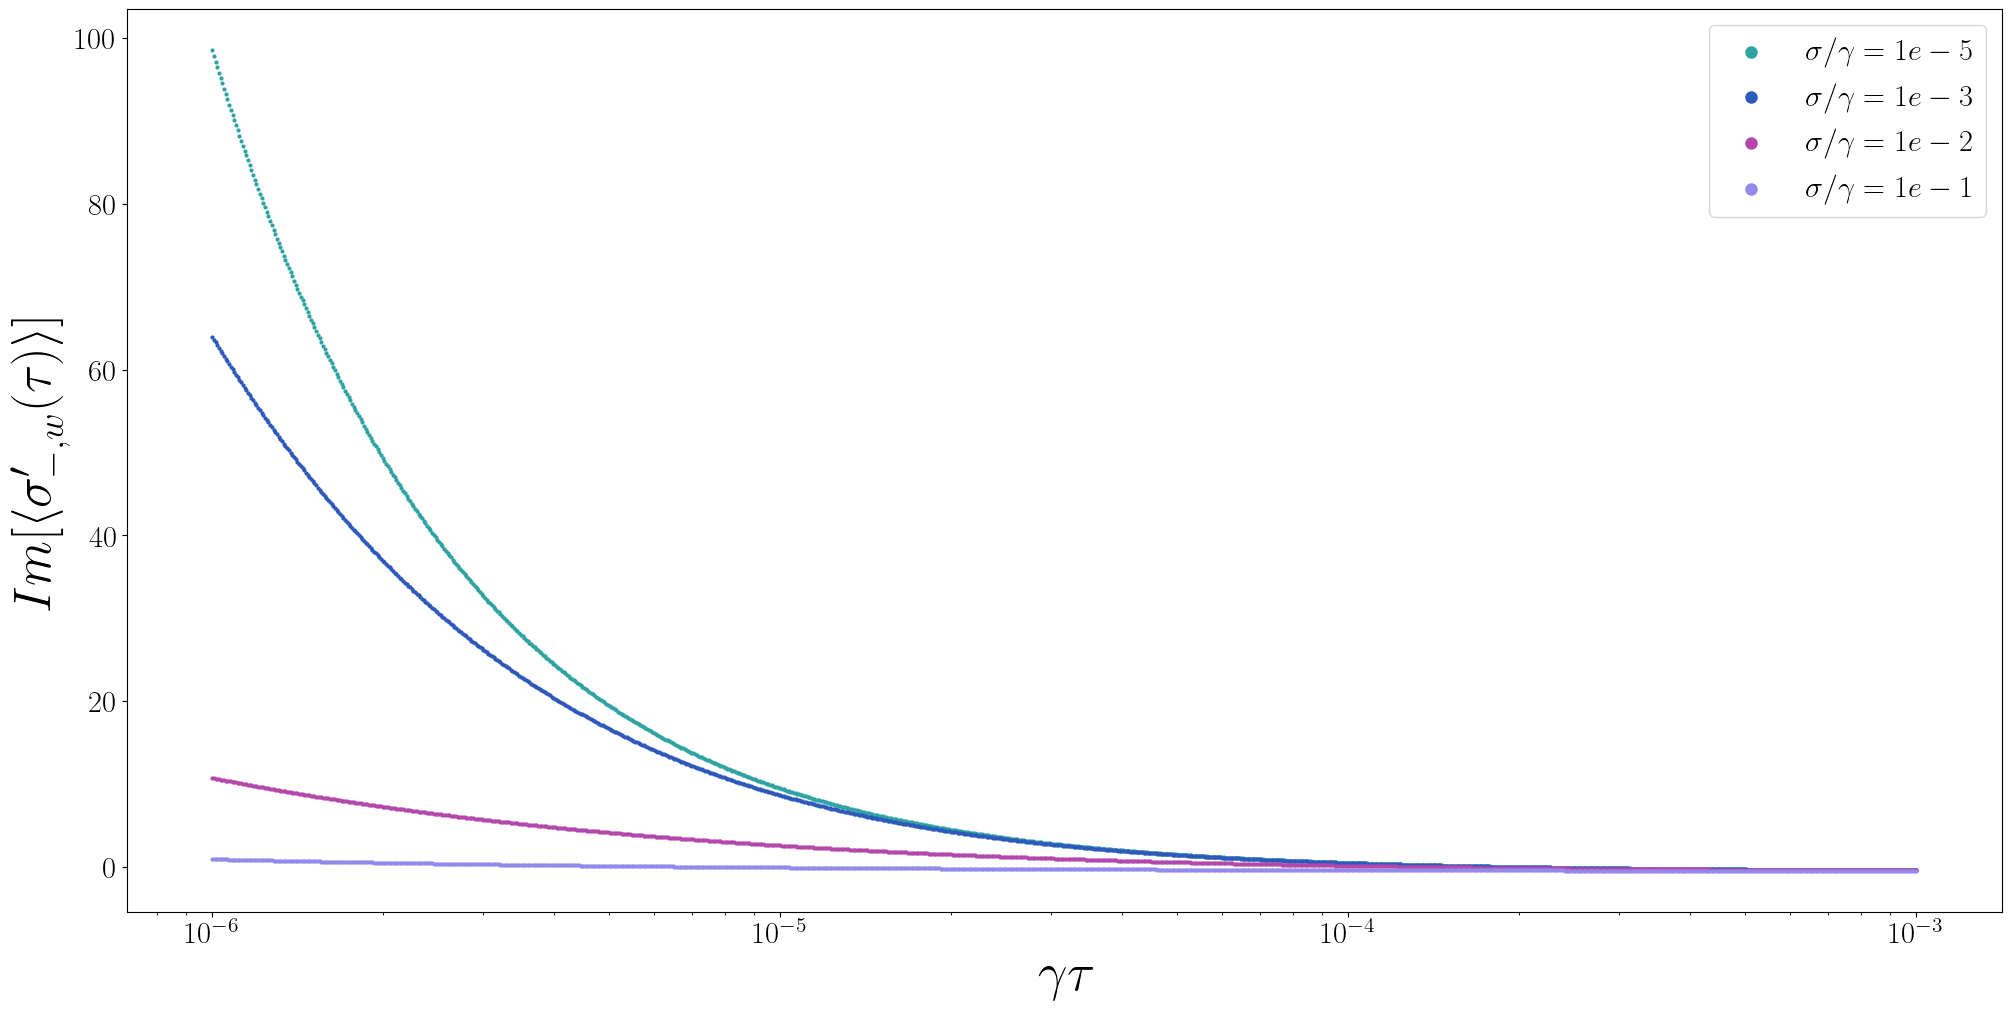

In [32]:
delta = 1e-4
params['u'] = np.array([0,1,0])
params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder, plot against tau
omega_a_samples = np.int64(1e3)
tau_samples = np.int64(1e3)

sigmas = np.array([1e-5, 1e-3, 1e-2, 1e-1])
#sigmas = np.array([1e-1,1,1e1])

params['omega_as'] = generator.normal(0, sigmas.reshape(-1,1), (*sigmas.shape, omega_a_samples))
params['omega_a_0'] = 0
params['sigmas'] = ["1e-5", "1e-3", "1e-2", "1e-1"]
params['t'] = 1
params['tau'] = np.geomspace(1e-6, 1e-3, tau_samples)
params['gamma'] = 1

results = wv_pipeline(params, field_quads=False)
plot_im_against_tau(results, plot_wv_0s=False, log_xscale=True, log_yscale=False)

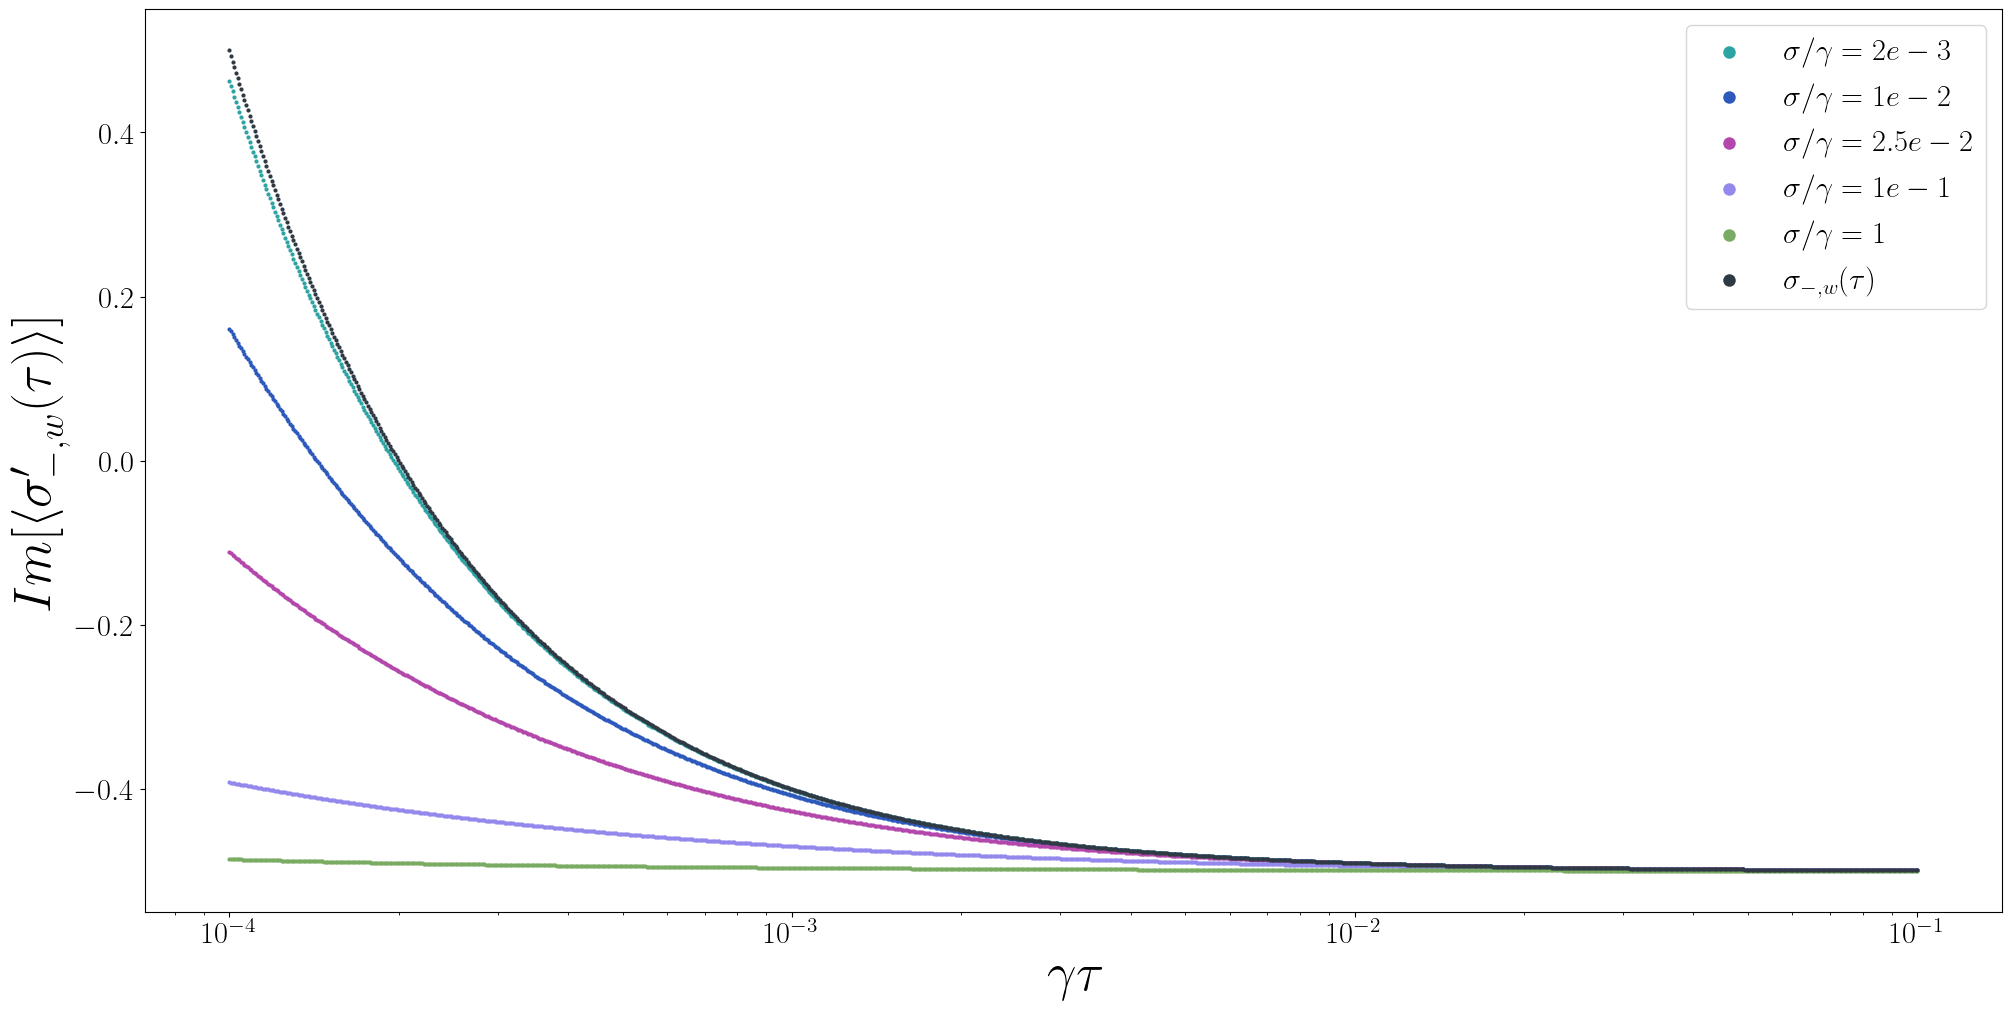

In [33]:
delta = 1e-4
params['u'] = np.array([0,1,0])
params['v'] = np.array([0,-np.cos(delta),np.sin(delta)])
params['m']=  np.array([1,-1j,0])/2

# Gaussian disorder, plot against tau
omega_a_samples = np.int64(1e3)
tau_samples = np.int64(1e3)

sigmas = np.array([2e-3, 1e-2, 2.5e-2, 1e-1, 1])
#sigmas = np.array([1e-1,1,1e1])

params['omega_as'] = generator.normal(0, sigmas.reshape(-1,1), (*sigmas.shape, omega_a_samples))
params['omega_a_0'] = 0
params['sigmas'] = ["2e-3", "1e-2", "2.5e-2", "1e-1", "1"]
params['t'] = 1
params['tau'] = np.geomspace(1e-4, 1e-1, tau_samples)
params['gamma'] = 1

results = wv_pipeline(params, field_quads=False)
plot_im_against_tau(results, plot_wv_0s=True, log_xscale=True, log_yscale=False)